In [1]:
import skimage.io
import jview
import os
from collections import defaultdict
import matplotlib.pyplot as plt
import numpy as np

In [2]:
dataset = 'SAM'
DATASET_PATH = os.path.join('/scratch/ottosson/datasets', dataset)
CELLPOSE_PATH = os.path.join(DATASET_PATH, 'cellpose_training')
TRAIN_PATH = os.path.join(DATASET_PATH, 'cellpose_training','train')
VAL_PATH = os.path.join(DATASET_PATH, 'cellpose_training', 'val')

In [3]:
print("Cellpose path exist: ", os.path.isdir(CELLPOSE_PATH))
print("Train path exist: ", os.path.isdir(TRAIN_PATH))
print("VAL path exist: ", os.path.isdir(VAL_PATH))
print(f"Train dir has {len(os.listdir(TRAIN_PATH))} files")
print(f"Val dir has {len(os.listdir(VAL_PATH))} files")

Cellpose path exist:  True
Train path exist:  True
VAL path exist:  True
Train dir has 70044 files
Val dir has 2406 files


# What is in the dir

In [4]:
files = os.listdir(TRAIN_PATH)
num_file_types = defaultdict(int)
for f in files:
    num_file_types[jview.get_extention(f)] +=1
print("TRAIN: Number of different files (based on extentions)")
jview.print_dir(num_file_types)

files = os.listdir(VAL_PATH)
num_file_types = defaultdict(int)
for f in files:
    num_file_types[jview.get_extention(f)] +=1
print("VAL: Number of different files (based on extentions)")
jview.print_dir(num_file_types)

TRAIN: Number of different files (based on extentions)
tif :  70044
VAL: Number of different files (based on extentions)
tif :  2406


In [5]:
# Does all files has it matches?

for path in [TRAIN_PATH, VAL_PATH]:
    sample_name_list = []
    for f in os.listdir(path):
        if f.split('.')[-1] != 'tif': continue
        sample_name_list.append(f.split('_')[0]+'_'+f.split('_')[1])
    sample_names = set(sample_name_list)

    for sample_name in sample_names:
        raw_name = sample_name + '_raw.tif'
        label_name = sample_name + '_label.tif'
        flows_name = sample_name + '_flows.tif'
        assert os.path.isfile(os.path.join(path, raw_name)), f'Raw file does not exist {raw_name}'
        assert os.path.isfile(os.path.join(path, label_name)), f'label file does not exist'
        assert os.path.isfile(os.path.join(path, flows_name)), f'flows file does not exist'
        
    print("All names have raw, label, and flows in ", path)

All names have raw, label, and flows in  /scratch/ottosson/datasets/SAM/cellpose_training/train
All names have raw, label, and flows in  /scratch/ottosson/datasets/SAM/cellpose_training/val


# What is in the files?

In [6]:
ndims = defaultdict(list)
shapes = defaultdict(list)
dtypes = defaultdict(list)
mins = defaultdict(list)
maxs = defaultdict(list)
for f in os.listdir(TRAIN_PATH):
    if jview.get_extention(f) != 'tif': continue
    img_type = f.split('.')[0].split('_')[-1]
    im = skimage.io.imread(os.path.join(TRAIN_PATH, f))
    ndims[img_type].append(im.ndim)
    dtypes[img_type].append(im.dtype)
    mins[img_type].append(im.min())
    maxs[img_type].append(im.max())
print("TRAIN info")
for img_type in ['raw', 'label', 'flows']:
    print("Image type: ", img_type)    
    print("\tNdims: ", np.unique(np.array(ndims[img_type])))
    print("\tdtypes: ", np.unique(np.array(dtypes[img_type])))
    print("\tmins: ", np.min(mins[img_type]), " - ", np.max(mins[img_type]))
    print("\tmaxs: ", np.min(maxs[img_type]), " - ", np.max(maxs[img_type]))

TRAIN info
Image type:  raw
	Ndims:  [3]
	dtypes:  [dtype('uint8')]
	mins:  0  -  0
	maxs:  0  -  255
Image type:  label
	Ndims:  [3]
	dtypes:  [dtype('uint16')]
	mins:  0  -  0
	maxs:  0  -  1698
Image type:  flows
	Ndims:  [3]
	dtypes:  [dtype('float32')]
	mins:  -1.0  -  0.0
	maxs:  0.0  -  410.0


In [7]:
ndims = defaultdict(list)
shapes = defaultdict(list)
dtypes = defaultdict(list)
mins = defaultdict(list)
maxs = defaultdict(list)
for f in os.listdir(VAL_PATH):
    if jview.get_extention(f) != 'tif': continue
    img_type = f.split('.')[0].split('_')[-1]
    im = skimage.io.imread(os.path.join(VAL_PATH, f))
    ndims[img_type].append(im.ndim)
    dtypes[img_type].append(im.dtype)
    mins[img_type].append(im.min())
    maxs[img_type].append(im.max())
print("VAL info")
for img_type in ['raw', 'label', 'flows']:
    print("Image type: ", img_type)    
    print("\tNdims: ", np.unique(np.array(ndims[img_type])))
    print("\tdtypes: ", np.unique(np.array(dtypes[img_type])))
    print("\tmins: ", np.min(mins[img_type]), " - ", np.max(mins[img_type]))
    print("\tmaxs: ", np.min(maxs[img_type]), " - ", np.max(maxs[img_type]))

VAL info
Image type:  raw
	Ndims:  [3]
	dtypes:  [dtype('uint8')]
	mins:  0  -  0
	maxs:  0  -  255
Image type:  label
	Ndims:  [3]
	dtypes:  [dtype('uint16')]
	mins:  0  -  0
	maxs:  0  -  1153
Image type:  flows
	Ndims:  [3]
	dtypes:  [dtype('float32')]
	mins:  -1.0  -  0.0
	maxs:  0.0  -  285.0


In [8]:
# Extra about flow
for path in [TRAIN_PATH, VAL_PATH]:
    mins = defaultdict(list)
    maxs = defaultdict(list)
    for f in os.listdir(path):
        if jview.get_extention(f) != 'tif': continue
        if f.split('.')[0].split('_')[-1] != 'flows': continue
        im = skimage.io.imread(os.path.join(path, f))
        for dim in range(im.shape[-1]):
            mins[dim].append(im[:,:,dim].min())
            maxs[dim].append(im[:,:,dim].max())
    print("FLow ranges of: ", path)
    for dim in range(4):
        print("Dim: ", dim)
        print("\tmins: ", np.min(mins[dim]), " - ", np.max(mins[dim]))
        print("\tmaxs: ", np.min(maxs[dim]), " - ", np.max(maxs[dim]))

FLow ranges of:  /scratch/ottosson/datasets/SAM/cellpose_training/train
Dim:  0
	mins:  0.0  -  0.0
	maxs:  0.0  -  410.0
Dim:  1
	mins:  0.0  -  0.0
	maxs:  0.0  -  1.0
Dim:  2
	mins:  -1.0  -  0.0
	maxs:  0.0  -  1.0
Dim:  3
	mins:  -1.0  -  0.0
	maxs:  0.0  -  1.0
FLow ranges of:  /scratch/ottosson/datasets/SAM/cellpose_training/val
Dim:  0
	mins:  0.0  -  0.0
	maxs:  0.0  -  285.0
Dim:  1
	mins:  0.0  -  0.0
	maxs:  0.0  -  1.0
Dim:  2
	mins:  -1.0  -  0.0
	maxs:  0.0  -  1.0
Dim:  3
	mins:  -1.0  -  0.0
	maxs:  0.0  -  1.0


In [13]:
path = TRAIN_PATH
filename = os.listdir(path)[7]
sample_name = filename.split('_')[0]+'_'+filename.split('_')[1]
raw = skimage.io.imread(os.path.join(path, sample_name +'_raw.tif'))
label = skimage.io.imread(os.path.join(path, sample_name +'_label.tif'))
flows= skimage.io.imread(os.path.join(path, sample_name +'_flows.tif'))

In [14]:
def random_labeling(label, start_label = 1, min_color = 100):
    label=label.astype(int)
    # label to color
    l2c = np.random.randint(min_color, 255, size = (label.max()+1,))
    for l in range(start_label):
        l2c[l] = l
    label_ = np.zeros_like(label)
    for l in np.unique(label):
        if l < start_label: continue
        label_[label==l] = l2c[l]
    return label_


In [15]:
print("Raw sample shape: ", raw.shape)
print("Label sample shape: ", label.shape)
print("Flows sample shape: ", flows.shape)

Raw sample shape:  (1, 512, 512)
Label sample shape:  (1, 512, 512)
Flows sample shape:  (512, 512, 4)


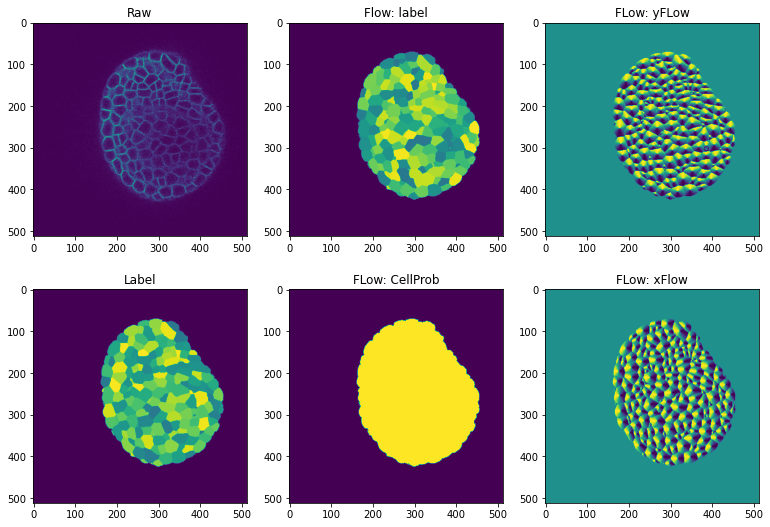

In [16]:
fig,axs = plt.subplots(2,3)
axs[0,0].imshow(raw[0])
axs[0,0].set_title('Raw')
axs[1,0].imshow(random_labeling(label[0], start_label = 1))
axs[1,0].set_title('Label')
axs[0,1].imshow(random_labeling(flows[:,:,0], start_label = 1))
axs[0,1].set_title('Flow: label')
axs[1,1].imshow(flows[:,:,1])
axs[1,1].set_title('FLow: CellProb')
axs[0,2].imshow(flows[:,:,2])
axs[0,2].set_title('FLow: yFLow')
axs[1,2].imshow(flows[:,:,3])
axs[1,2].set_title('FLow: xFlow')
fig.set_size_inches(13,9)